In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Adjust this path to your google earth engine json
key_file_path = '/content/drive/My Drive/colab_keys/gen-lang-client-0722638269-533d5c351802.json'

# Check if the file exists at the specified path
if not os.path.exists(key_file_path):
    raise FileNotFoundError(f"Key file not found at: {key_file_path}. Please check the path.")

# Set the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_file_path

print(f"GOOGLE_APPLICATION_CREDENTIALS set to: {os.environ['GOOGLE_APPLICATION_CREDENTIALS']}")

# Now you can initialize Earth Engine
# import ee
# ee.Initialize(project='your-gcp-project-id') # Make sure to replace 'your-gcp-project-id'
# print(ee.Image('srtm90_v4').getRegion(ee.Geometry.Point(-122.085, 37.422), 10).getInfo())

Mounted at /content/drive
GOOGLE_APPLICATION_CREDENTIALS set to: /content/drive/My Drive/colab_keys/gen-lang-client-0722638269-533d5c351802.json


In [ ]:
%%bash
mkdir amazon-scout && cd amazon-scout
git init && git switch -c dev
mkdir -p data/raw/{dem,lidar,hydro} notebooks logs


Initialized empty Git repository in /content/amazon-scout/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Switched to a new branch 'dev'


In [16]:
# CELL 1: Install Mambaforge (a minimal conda installer with Mamba)
# This will prompt you to restart the session. Do it.
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [1]:
# CELL 2: Install core geospatial and problematic libraries using Mamba
# This will take some time as it resolves and installs many dependencies.
# We're getting PDAL, RichDEM, GDAL (for rasterio/geopandas), and their Python bindings.
# Shapely is also better from conda-forge.
print("Installing PDAL, RichDEM, GDAL, Rasterio, GeoPandas, Shapely via Mamba...")
!mamba install -c conda-forge pdal python-pdal richdem gdal rasterio geopandas shapely tqdm -y --quiet
print("Mamba installation complete.")

# Check versions of some key mamba-installed packages
print("\n--- Versions from Mamba ---")
!python -c "import pdal; print(f'PDAL: {pdal.__version__}')"
!python -c "import richdem; print(f'RichDEM: installed (version not easily accessible, but import works)')"
!python -c "import rasterio; print(f'Rasterio: {rasterio.__version__}')"
!python -c "import geopandas; print(f'GeoPandas: {geopandas.__version__}')"
!python -c "import shapely; print(f'Shapely: {shapely.__version__}')"
!python -c "import tqdm; print(f'TQDM: {tqdm.__version__}')"

Installing PDAL, RichDEM, GDAL, Rasterio, GeoPandas, Shapely via Mamba...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 
To enable CUDA support, UCX requires the CUDA Runtime library (libcudart).
The library can be installed with the appropriate command below:

* For CUDA 11, run:    conda install cudatoolkit cuda-version=11
* For CUDA 12, run:    conda install cuda-cudart cuda-version=12

If any of the packages you requested use CUDA then CUDA should already
have been installed for you.



To enable CUDA support, please follow UCX's instruction above.

To additionally enable NCCL support, run:    conda install nccl



On Linux, Open MPI is built with CUDA awareness but it is disabled by default.
To enable it, please set the environment variable
OMPI_MCA_opal_cuda_support=true
before launching your MPI processes.
Equivalently, you can set the MCA parameter in the command line:
mpiexec --mca opal_cuda_support 1 .

In [2]:
# CELL 3: Install remaining packages using pip (within the conda environment)
print("\nInstalling earthengine-api, geemap, openai, python-dotenv via pip...")
!pip install earthengine-api geemap openai python-dotenv -q --no-cache-dir
print("Pip installation complete.")

# Check versions of pip-installed packages
print("\n--- Versions from Pip ---")
!python -c "import ee; print(f'Earth Engine API: {ee.__version__}')"
!python -c "import geemap; print(f'Geemap: {geemap.__version__}')"
!python -c "import openai; print(f'OpenAI: {openai.__version__}')"
!python -c "import dotenv; print(f'python-dotenv: (imported as dotenv)')"

print("\nAll requested packages should now be installed.")


Installing earthengine-api, geemap, openai, python-dotenv via pip...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 774.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 262.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 947.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 313.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 375.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 206.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 270.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 509.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.3/604.3 kB 755.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 929.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [8]:
import ee, os
ee.Authenticate(authorization_code=None)
ee.Initialize(project='gen-lang-client-0722638269')


In [9]:
bbox = ee.Geometry.BBox(-71, -13, -66, -9)      # Acre & Xingu
srtm  = ee.Image('USGS/SRTMGL1_003').clip(bbox)  # 30 m DEM
task  = ee.batch.Export.image.toDrive(
    image=srtm,
    description='srtm_sw_amazon',
    scale=30, region=bbox, folder='dem')
task.start()


In [11]:
# --- Configuration ---
# Direct download URL for the South America HydroRIVERS shapefile
zip_file_url = "https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_sa_shp.zip"

# Desired local filename (you can keep it as the server provides or rename)
# If you want to match your original name:
local_zip_filename = "SouthAmerica_HydroRIVERS_v10.zip"
# Or, to use the name from the server (simpler):
# local_zip_filename = "HydroRIVERS_v10_sa_shp.zip" # Use this if you don't want to rename

# Target directory for unzipping
output_directory = "data/raw/hydro"

# --- Step 1: Download the file using wget ---
# The -O flag specifies the output filename.
# The -q flag makes wget quiet (less output).
print(f"Downloading {zip_file_url} to {local_zip_filename}...")
!wget -q -O {local_zip_filename} {zip_file_url}
print("Download complete.")

# --- Step 2: Create the target directory structure ---
# The -p flag creates parent directories if they don't exist
# and doesn't error if the directory already exists.
print(f"\nCreating directory {output_directory}...")
!mkdir -p {output_directory}
print("Directory created (if it didn't exist).")

# --- Step 3: Unzip the file into the target directory ---
# The -d flag specifies the destination directory.
# The -o flag overwrites files without prompting (useful if you re-run the cell).
# The -q flag makes unzip quiet.
print(f"\nUnzipping {local_zip_filename} to {output_directory}...")
!unzip -o -q {local_zip_filename} -d {output_directory}
print("Unzipping complete.")

# --- Step 4: (Optional) List the contents of the directory to verify ---
print(f"\nContents of {output_directory}:")
!ls {output_directory}

# --- Step 5: (Optional) Remove the downloaded zip file to save space ---
# Especially useful if you're working with many large files in Colab's limited storage.
print(f"\nRemoving downloaded zip file: {local_zip_filename}...")
!rm {local_zip_filename}
print("Zip file removed.")

print("\n--- All steps completed ---")

Download complete.

Creating directory data/raw/hydro...
Directory created (if it didn't exist).

Unzipping SouthAmerica_HydroRIVERS_v10.zip to data/raw/hydro...
Unzipping complete.

Contents of data/raw/hydro:
HydroRIVERS_TechDoc_v10.pdf  HydroRIVERS_v10_sa_shp

Removing downloaded zip file: SouthAmerica_HydroRIVERS_v10.zip...
Zip file removed.

--- All steps completed ---


In [2]:
import os
from google.colab import userdata # Import the userdata module

# Make sure the directory exists
!mkdir -p data/raw/lidar

# Delete any previous attempt to avoid confusion (optional, but good for testing)
!rm -f data/raw/lidar/sample_dtm.tif

# 1. Get the API key from Colab secrets using userdata.get()
ot_key_from_colab = userdata.get('OT_API_KEY') # Use the exact name of your secret

# 2. Check if the key was actually retrieved
if ot_key_from_colab:
    print(f"Successfully retrieved OT_API_KEY.") # Confirmation

    # 3. Construct the command string using an f-string to insert the key
    # Using slightly larger coordinates just in case the previous tiny area had no data
    curl_command_str = f"curl -L -o data/raw/lidar/sample_dtm.tif \
    \"https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=37.0&north=37.05&west=-122.0&east=-121.95&outputFormat=GTiff&API_Key={ot_key_from_colab}\""

    # Print the command to verify it looks correct (optional, good for debugging)
    print(f"Executing command: {curl_command_str}")

    # 4. Execute the constructed command using IPython's system call
    get_ipython().system(curl_command_str)

else:
    print("Failed to retrieve OT_API_KEY using userdata.get().")
    print("Please double-check:")
    print("1. The secret name in Colab UI is exactly 'OT_API_KEY'.")
    print("2. 'Notebook access' for this secret is enabled.")
    print("3. You have run this cell after any recent changes to secrets or session restarts.")

# 5. Check the result
print("\n--- Checking downloaded file ---")
!ls -lh data/raw/lidar/sample_dtm.tif
print("\n--- Running gdalinfo ---")
!gdalinfo data/raw/lidar/sample_dtm.tif
print("\n--- Displaying first few lines of the file (if gdalinfo failed) ---")
!head -n 5 data/raw/lidar/sample_dtm.tif

Successfully retrieved OT_API_KEY.
Executing command: curl -L -o data/raw/lidar/sample_dtm.tif     "https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=37.0&north=37.05&west=-122.0&east=-121.95&outputFormat=GTiff&API_Key=146361fcd7787a40eed58ebf2d59fec0"
curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40295    0 40295    0     0   3607      0 --:--:--  0:00:11 --:--:--  9216

--- Checking downloaded file ---
-rw-r--r-- 1 root root 40K May 16 00:54 data/raw/lidar/sample_dtm.tif

--- Running gdalinfo ---
Driver: GTiff/GeoTIFF
Warning 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
Files: data/raw/lidar/sample_dtm.tif
Size is 180, 180
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,2

In [3]:
!gdaldem hillshade data/raw/lidar/sample_dtm.tif \
                data/raw/lidar/sample_hs.tif -z 1.5


Warning 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
0ERROR 1: PROJ: proj_create_from_name: Open of /usr/local/share/proj failed
...10...20...30...40...50...60...70...80...90...100 - done.


In [4]:
!gdal_translate -outsize 512 512 -of PNG \
              data/raw/lidar/sample_hs.tif \
              data/raw/lidar/hs_512.png


Input file size is 180, 180
0...10...20...30...40...50...60...70...80...90...100 - done.


In [5]:
from PIL import Image
import base64, io, sqlite3, hashlib, openai, os, datetime as dt

def encode_png(path):
    with Image.open(path) as im:
        buf = io.BytesIO(); im.save(buf, format="PNG")
        return "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode()

def log_result(img_md5, resp_json):
    with sqlite3.connect('logs/day1.sqlite') as db:
        db.execute("""CREATE TABLE IF NOT EXISTS calls
                   (ts TEXT, img_md5 TEXT, response TEXT)""")
        db.execute("INSERT INTO calls VALUES (?,?,?)",
                   (dt.datetime.utcnow(), img_md5, str(resp_json)))


In [7]:
from google.colab import userdata

!mkdir -p logs

PROMPT = """You are an archaeological scout.
Return JSON: {"label": "yes"|"no"|"maybe", "confidence": 0-1}
Criteria: convex or rectilinear shape 70-400 m across; embankment rim visible."""
img_path = "data/raw/lidar/hs_512.png"
b64      = encode_png(img_path)
img_md5  = hashlib.md5(open(img_path,'rb').read()).hexdigest()
api_key_from_colab = userdata.get("OPENAI_API_KEY")

client = openai.OpenAI(api_key=api_key_from_colab)
resp   = client.chat.completions.create(
    model="gpt-4o-2024-05-13",
    messages=[{"role":"user",
               "content":[{"type":"text","text":PROMPT},
                          {"type":"image_url","image_url":{"url":b64}}]}])
log_result(img_md5, resp.choices[0].message.content)


In [8]:
import sqlite3
import pandas as pd # For easier display

# Connect to the database
conn = sqlite3.connect('logs/day1.sqlite')
cursor = conn.cursor()

# Fetch all data from the 'calls' table
cursor.execute("SELECT * FROM calls")
rows = cursor.fetchall()

# Get column names
column_names = [description[0] for description in cursor.description]

# Close the connection
conn.close()

# Display the data using pandas DataFrame for nice formatting
df_logs = pd.DataFrame(rows, columns=column_names)
print(df_logs.to_string()) # .to_string() ensures the full content of the response is printed

# If you only have one row so far, you can also just print it:
for row in rows:
  print(f"Timestamp: {row[0]}")
  print(f"Image MD5: {row[1]}")
  print(f"GPT Response: {row[2]}") # This is the JSON string
  print("-" * 30)

                           ts                           img_md5                                                      response
0  2025-05-16 00:57:31.256347  7310cf4e4c40ca32712675d38ff06b87  ```json\n{\n  "label": "maybe",\n  "confidence": 0.6\n}\n```
Timestamp: 2025-05-16 00:57:31.256347
Image MD5: 7310cf4e4c40ca32712675d38ff06b87
GPT Response: ```json
{
  "label": "maybe",
  "confidence": 0.6
}
```
------------------------------


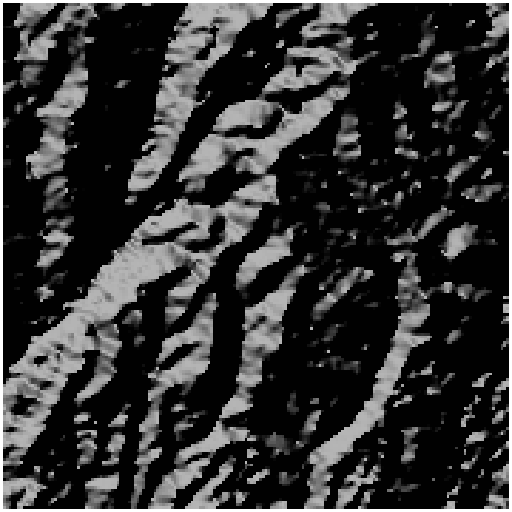

In [9]:
from IPython.display import Image, display

image_path_to_display = 'data/raw/lidar/hs_512.png'
display(Image(filename=image_path_to_display))